# ML Training Pipeline for Baseline model using Imazon's water data

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from WaterDataset import WaterDataset
from Baseline import Baseline
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

/home/ophirsim/miniconda3/envs/ClimaXtreme/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Train, Val, and Test Datasets and Dataloaders

In [2]:
N = 6
device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/train', timestep=N, device=device)
val_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/val', timestep=N, device=device)
test_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/test', timestep=N, device=device)

batch_size = 2
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

## Visualize Differences in Samples and Labels, separated by N months apart

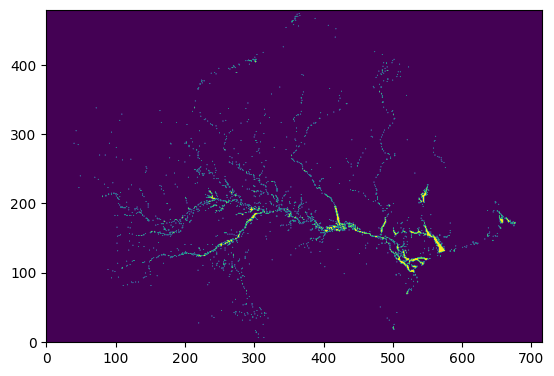

In [3]:
plt.imshow(train_set[0][0][0, :, :].cpu(), origin='lower')

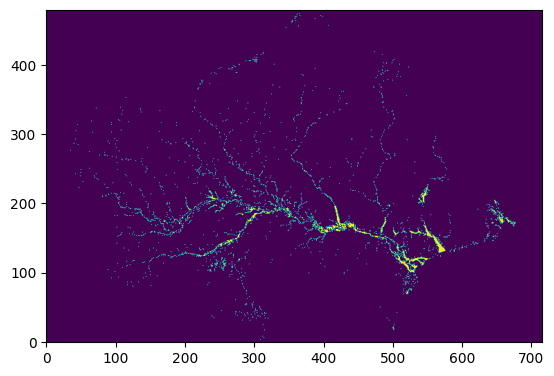

In [4]:
plt.imshow(train_set[0][1][0, :, :].cpu(), origin='lower')

## Load the Model

In [5]:
img_size = (480, 716)
emb_size = 480*716
model = Baseline(img_size, emb_size, device=device,
                patch_size=4,
                embed_dim=128,
                depth=3,
                decoder_depth=1,
                num_heads=2,
                dtype=torch.float)

## Train the Model

Epoch: 0
loss: 0.013818  [    2/  342]
loss: 0.012668  [   12/  342]
loss: 0.012801  [   22/  342]
loss: 0.012604  [   32/  342]
loss: 0.011657  [   42/  342]
loss: 0.012646  [   52/  342]
loss: 0.012080  [   62/  342]
loss: 0.012540  [   72/  342]
loss: 0.011912  [   82/  342]
loss: 0.012841  [   92/  342]
loss: 0.012392  [  102/  342]
loss: 0.012271  [  112/  342]
loss: 0.012545  [  122/  342]
loss: 0.012377  [  132/  342]
loss: 0.012760  [  142/  342]
loss: 0.012815  [  152/  342]
loss: 0.012947  [  162/  342]
loss: 0.013770  [  172/  342]
loss: 0.013303  [  182/  342]
loss: 0.014317  [  192/  342]
loss: 0.011946  [  202/  342]
loss: 0.012398  [  212/  342]
loss: 0.012773  [  222/  342]
loss: 0.013116  [  232/  342]
loss: 0.012515  [  242/  342]
loss: 0.011670  [  252/  342]
loss: 0.012513  [  262/  342]
loss: 0.011849  [  272/  342]
loss: 0.012701  [  282/  342]
loss: 0.013599  [  292/  342]
loss: 0.013095  [  302/  342]
loss: 0.013721  [  312/  342]
loss: 0.012588  [  322/  342]
l

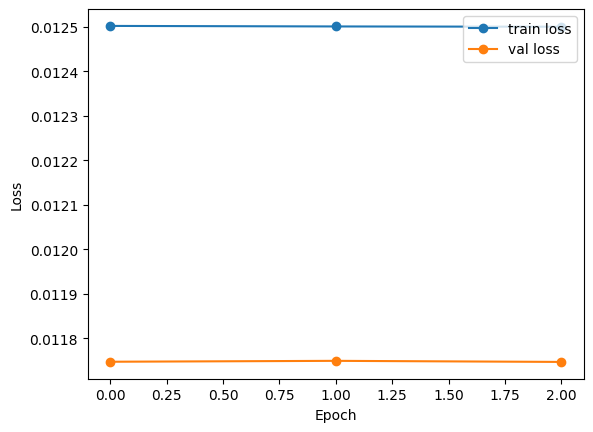

In [6]:
loss_fn = nn.MSELoss()
# TODO: implement better accuracy metrics
acc_metric = nn.MSELoss()

# TODO: tune learning parameters
lr = 0.01
weight_decay = 0.01
epochs = 3
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

train_losses, val_losses = train(train_loader, val_loader, model, loss_fn, optimizer, acc_metric, epochs)

plt.plot([x for x in range(len(train_losses))], train_losses, marker='o', linestyle="-", label='train loss')
plt.plot([x for x in range(len(val_losses))], val_losses, marker='o', linestyle="-", label='val loss')
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Test the Model

In [7]:
# TODO: establish accuracy metric
test_acc, test_loss = test(test_loader, model, loss_fn, acc_metric)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

test_acc: 0.005869545973837376
test_loss: 0.01173909225811561


In [8]:
# save the model
torch.save(model, 'model.ckpt')